# Model Training

 In this notebook we train three different models on the NetML challenge dataset. The target feature of this notebook is the ***top*** label.

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

%load_ext autoreload
%autoreload 2

In [2]:
# Dataset
label_column = "label_fine"

# Hyperparameters
test_size = 0.3

In [3]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
        
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Load features and labels

The preprocessed features and labels are stored in compressed pandas dataframe files. The next columns load these dataframes.

In [4]:
df_features = pd.read_pickle("features_final.pkl.gz", compression='gzip')
df_features

,hdr_distinct_scaled,rev_hdr_bin_40_scaled,rev_pld_distinct_scaled,num_pkts_in_scaled,pld_bin_inf_scaled,num_pkts_out_scaled,pr_scaled,hdr_bin_40_scaled,rev_pld_bin_128_scaled,hdr_mean_scaled,...,bytes_in_scaled,time_length_scaled,rev_pld_var_scaled,pld_mean_scaled,rev_pld_mean_scaled,pld_median_scaled,bytes_out_scaled,pld_max_scaled,feature_IP_masked,feature_IP_masked
id,,,,,,,,,,,,,,,,,,,,,
8128279,-0.132059,-0.048807,-0.135760,-0.090928,-0.027607,-0.110762,0.167552,-0.053277,-0.074329,-0.159214,...,0.000000,0.345070,0.00000,3.135494,0.000000,3.135494,3.806662,3.135494,True,True
1060911,-0.132059,-0.048807,0.419189,1.138796,-0.027607,0.817338,-5.968297,-0.053277,2.087883,3.815888,...,0.000000,5.888882,0.00000,1.945910,0.000000,1.945910,4.369448,1.945910,True,True
8338242,-0.132059,-0.048807,-0.135760,-0.090928,-0.027607,-0.110762,0.167552,-0.053277,-0.074329,-0.159214,...,0.000000,0.344792,0.00000,3.135494,0.000000,3.135494,3.806662,3.135494,True,True
8067075,-0.132059,-0.048807,0.419189,1.138796,-0.027607,0.817338,-5.968297,-0.053277,2.087883,3.815888,...,0.000000,5.888885,0.00000,1.945910,0.000000,1.945910,4.369448,1.945910,True,True
3497215,6.946995,0.148500,3.748884,1.138796,1.385037,1.154830,-5.968297,0.159535,0.757291,4.051082,...,8.670601,0.104180,6.25646,6.195242,6.107713,5.713733,9.026538,7.208600,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474371,-0.132059,-0.048807,0.419189,0.003666,-0.027607,-0.195135,0.167552,-0.053277,-0.074329,-0.159214,...,5.940171,0.000000,0.00000,3.526361,5.940171,3.526361,3.526361,3.526361,True,True
6706471,-0.132059,-0.048807,0.419189,0.003666,-0.027607,-0.195135,0.167552,-0.053277,-0.074329,-0.159214,...,5.509388,0.000000,0.00000,4.007333,5.509388,4.007333,4.007333,4.007333,True,True
654351,-0.132059,-0.048807,0.419189,0.003666,-0.027607,-0.195135,0.167552,-0.053277,-0.074329,-0.159214,...,5.393628,0.000000,0.00000,3.526361,5.393628,3.526361,3.526361,3.526361,True,True


In [5]:
df_labels = pd.read_pickle(f"{label_column}.pkl.gz", compression='gzip')
df_labels

,label_fine
id,
8128279,aim_chat
1060911,aim_chat
8338242,aim_chat
8067075,aim_chat
3497215,aim_chat
...,...
2474371,youtube
6706471,youtube
654351,youtube


## Distribution of the labels

The next diagram shows a distribution of the labels in the dataframe.

<Axes: xlabel='label_fine', ylabel='Count'>

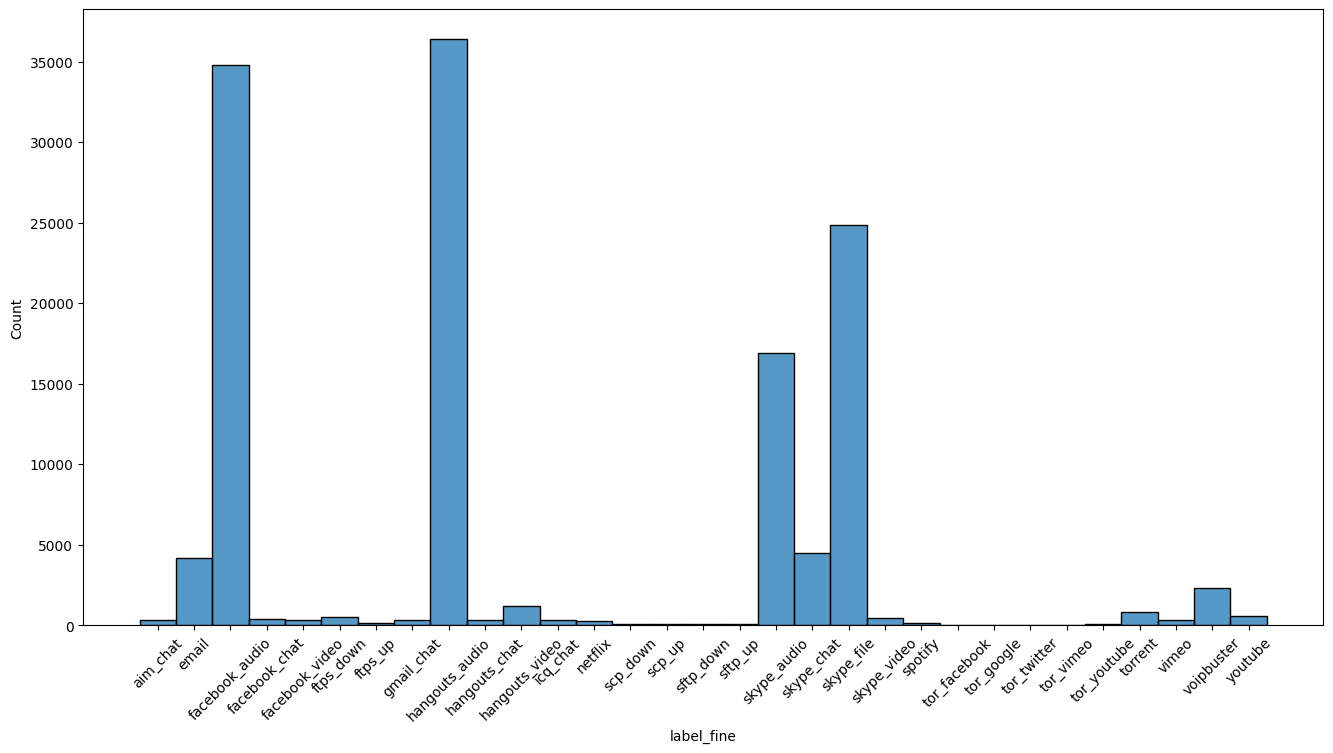

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax.tick_params(axis='x', rotation=45)
sns.histplot(data=df_labels, x=label_column, ax=ax)

## Model Training

We train three different models on the dataset:

- AdaBoostClassifier
- RandomForestClassifier
- GradientBoostingClassifier

For training we use 70% of the data, the other 30% are used for validation.

In [7]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, 
                                                    df_labels[label_column], 
                                                    test_size = test_size, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 91745 samples.
Testing set has 39320 samples.


In [8]:
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=1)
clf_B = RandomForestClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = X_train.shape[0]
samples_10 = int(X_train.shape[0] / 10)
samples_1 = int(X_train.shape[0] / 100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    # Save name of classifier
    clf_name = clf.__class__.__name__
    # Create an entry in the results dictionary
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

AdaBoostClassifier trained on 917 samples.
AdaBoostClassifier trained on 9174 samples.
AdaBoostClassifier trained on 91745 samples.
RandomForestClassifier trained on 917 samples.
RandomForestClassifier trained on 9174 samples.
RandomForestClassifier trained on 91745 samples.
GradientBoostingClassifier trained on 917 samples.
GradientBoostingClassifier trained on 9174 samples.
GradientBoostingClassifier trained on 91745 samples.


## Model Evaluation

The next diagram shows the performance of all three models on the training and on the testing dataset.

On the x-axis you can see how the models performs on 1%, 10% and 100% of the data of the correspinding dataset.

The left column shows the time needed for making predictions, the middle column shows the accuracy of the models and the right column shows the F-Score of each model.

The first row shows the performance of the model on the training data, the second row shows the performance on the test data.

/home/tilo/PycharmProjects/NetSec/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


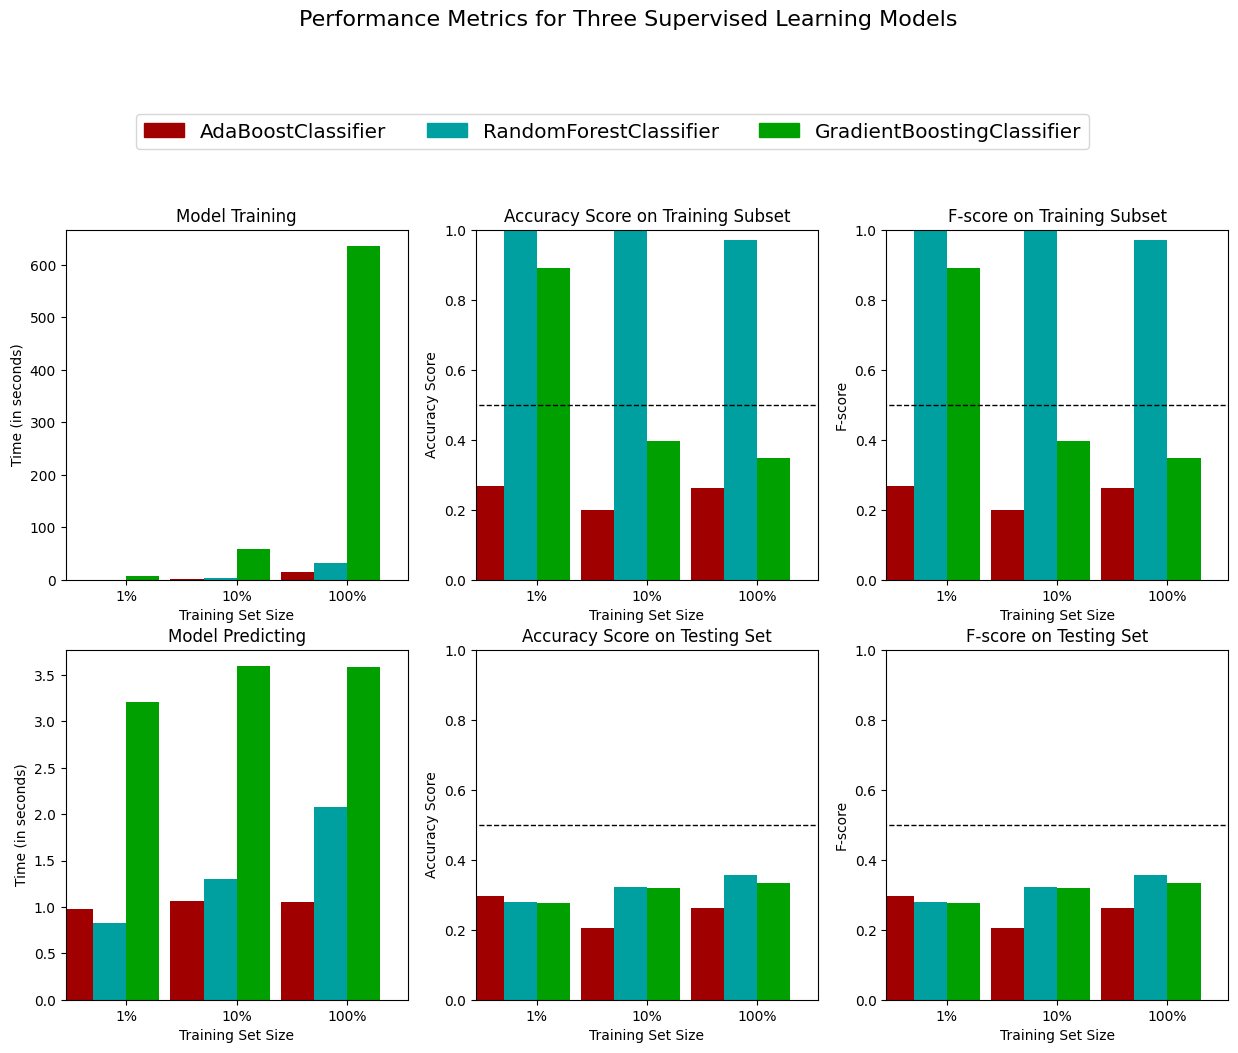

In [9]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy=0.5, f1=0.5)

## Confusion matrices

Next we will plot confusion matrices for each of the three models.

/tmp/ipykernel_7286/4290415642.py:9: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data
/tmp/ipykernel_7286/4290415642.py:9: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data


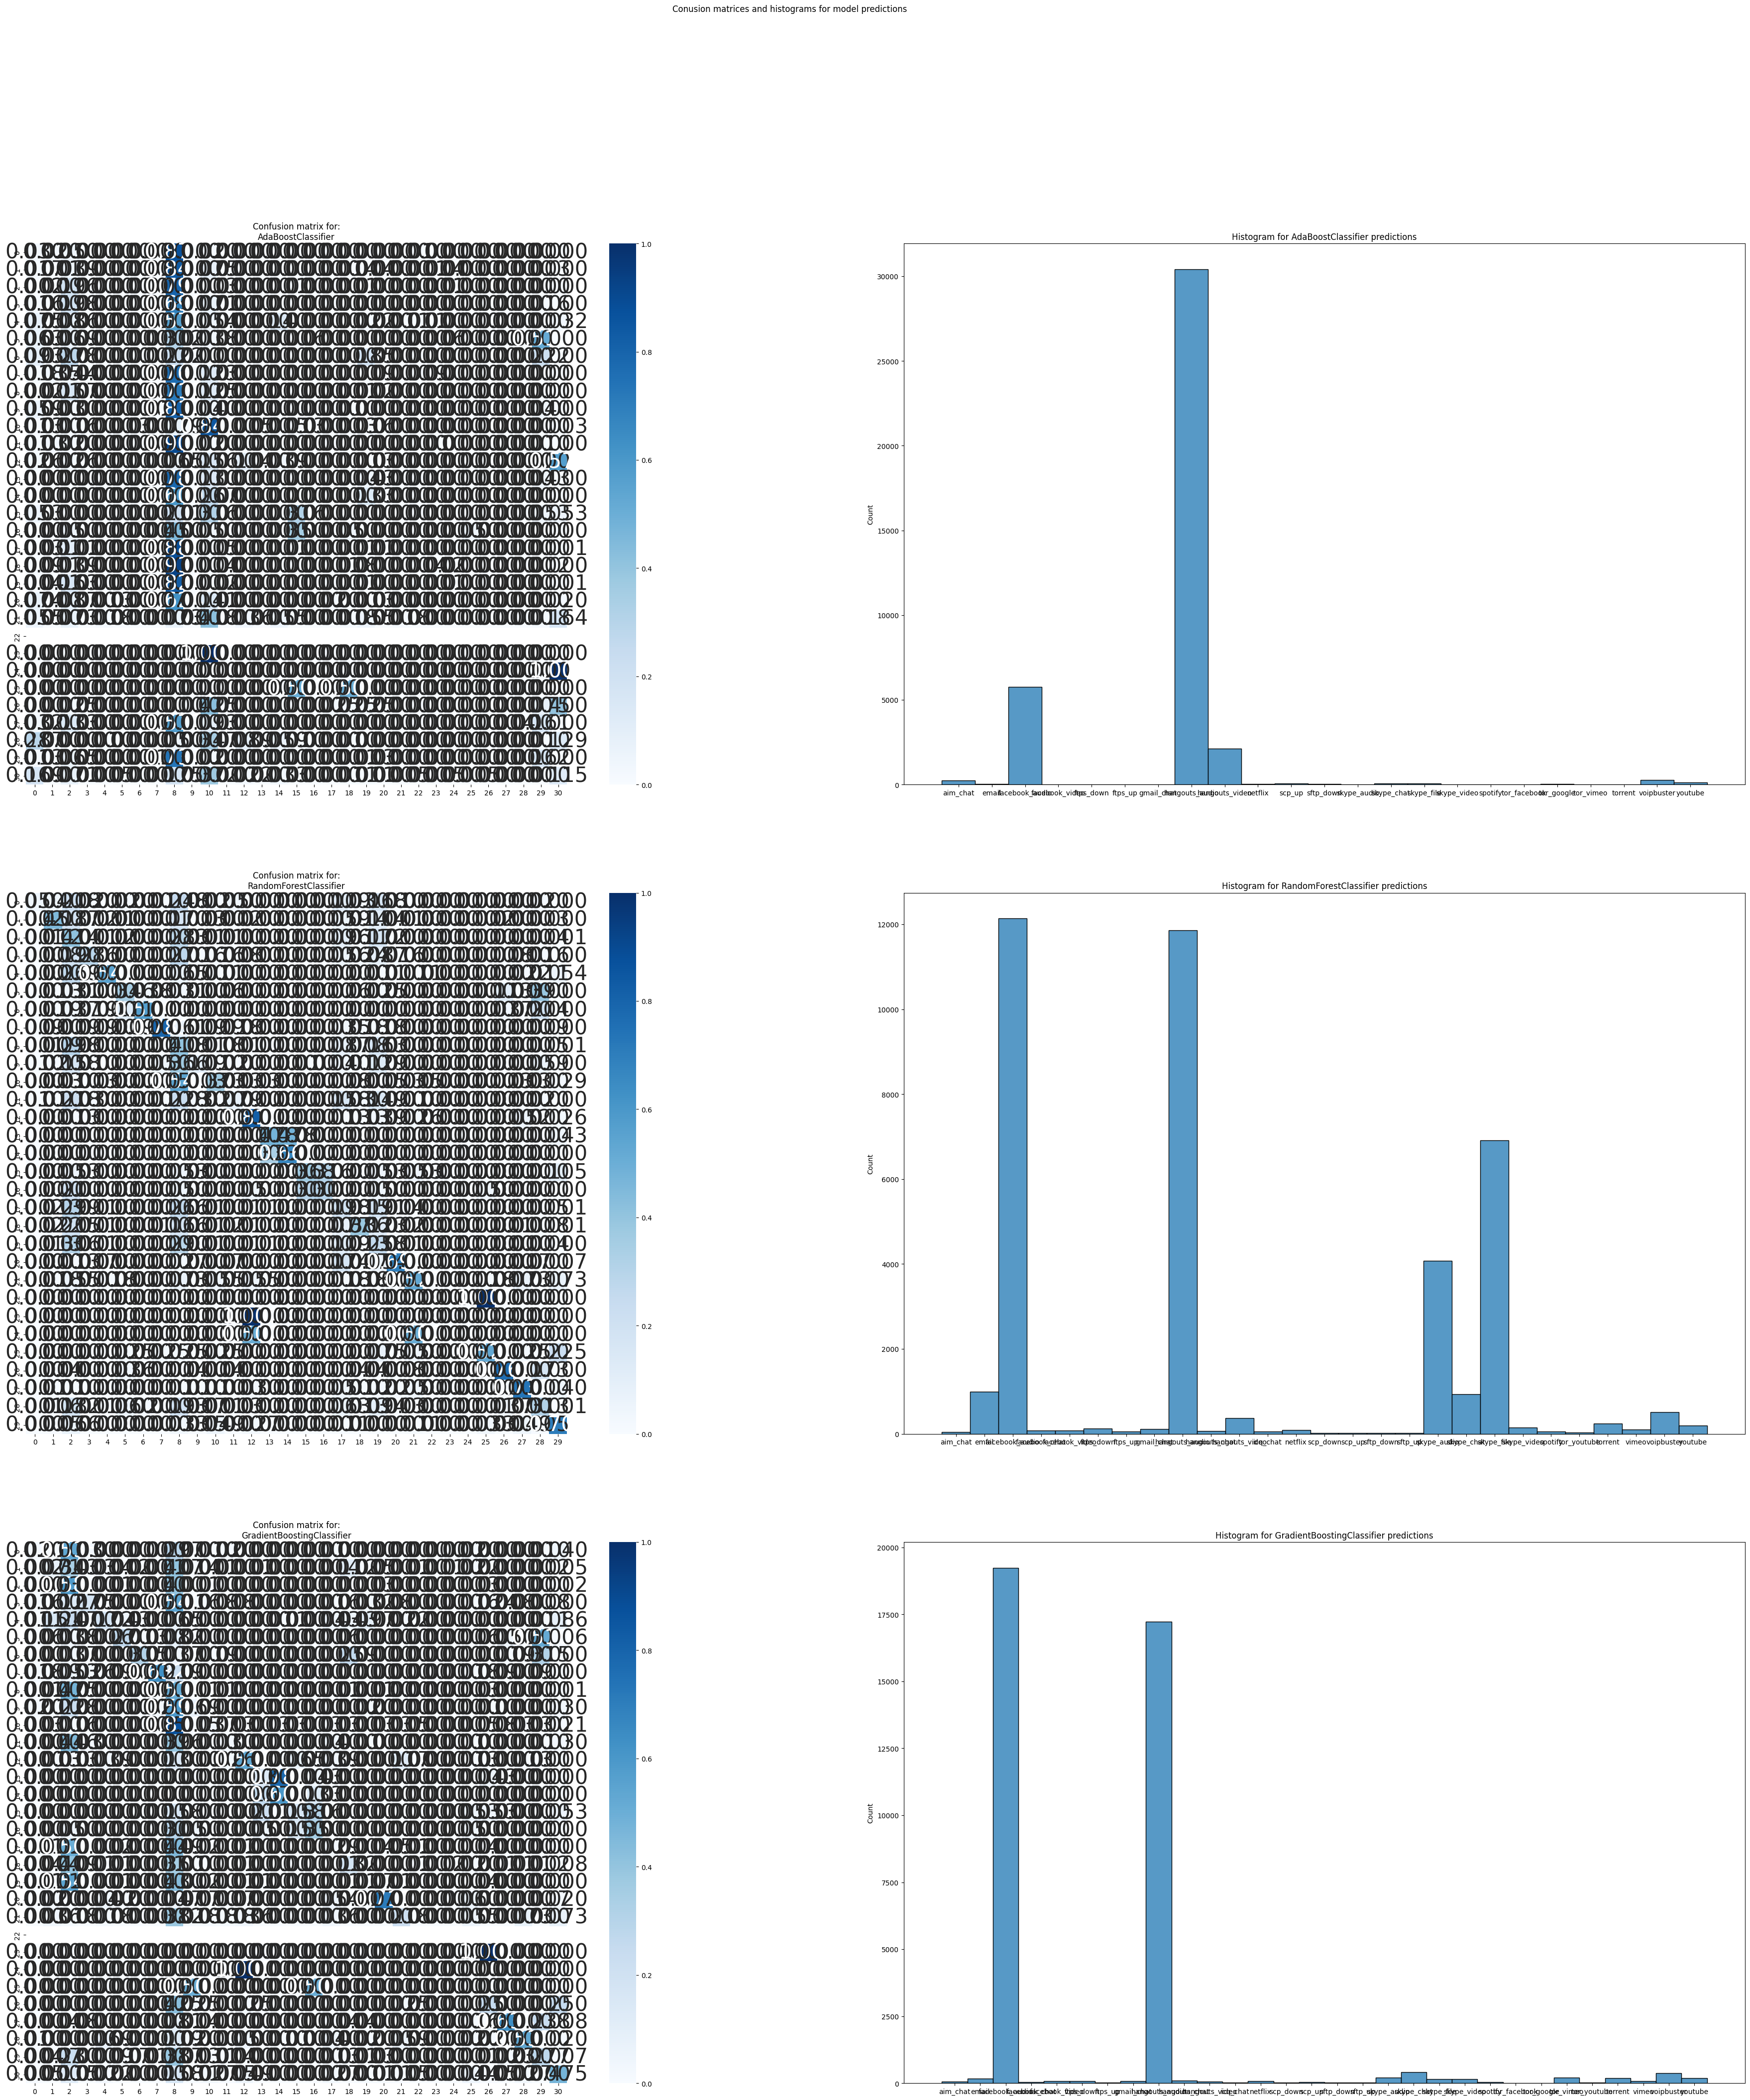

In [10]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(3, 2, figsize=(48,48))
fig.suptitle("Conusion matrices and histograms for model predictions")
distinct_labels = df_labels.drop_duplicates().sort_values(by=label_column)[label_column]

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    ax[i][0].set_title('Confusion matrix for:\n{}'.format(model.__class__.__name__))
    ax[i][0].set_ylabel('True label')
    ax[i][0].set_xlabel('Predicted label')
    sns.heatmap(cm, ax=ax[i][0], annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    predictions = model.predict(X_test)
    ax[i][1].set_title(f"Histogram for {model.__class__.__name__} predictions")
    sns.histplot(np.sort(predictions), ax=ax[i][1])

## Feature importances

The next diagrams show the ten most important features that each model found.

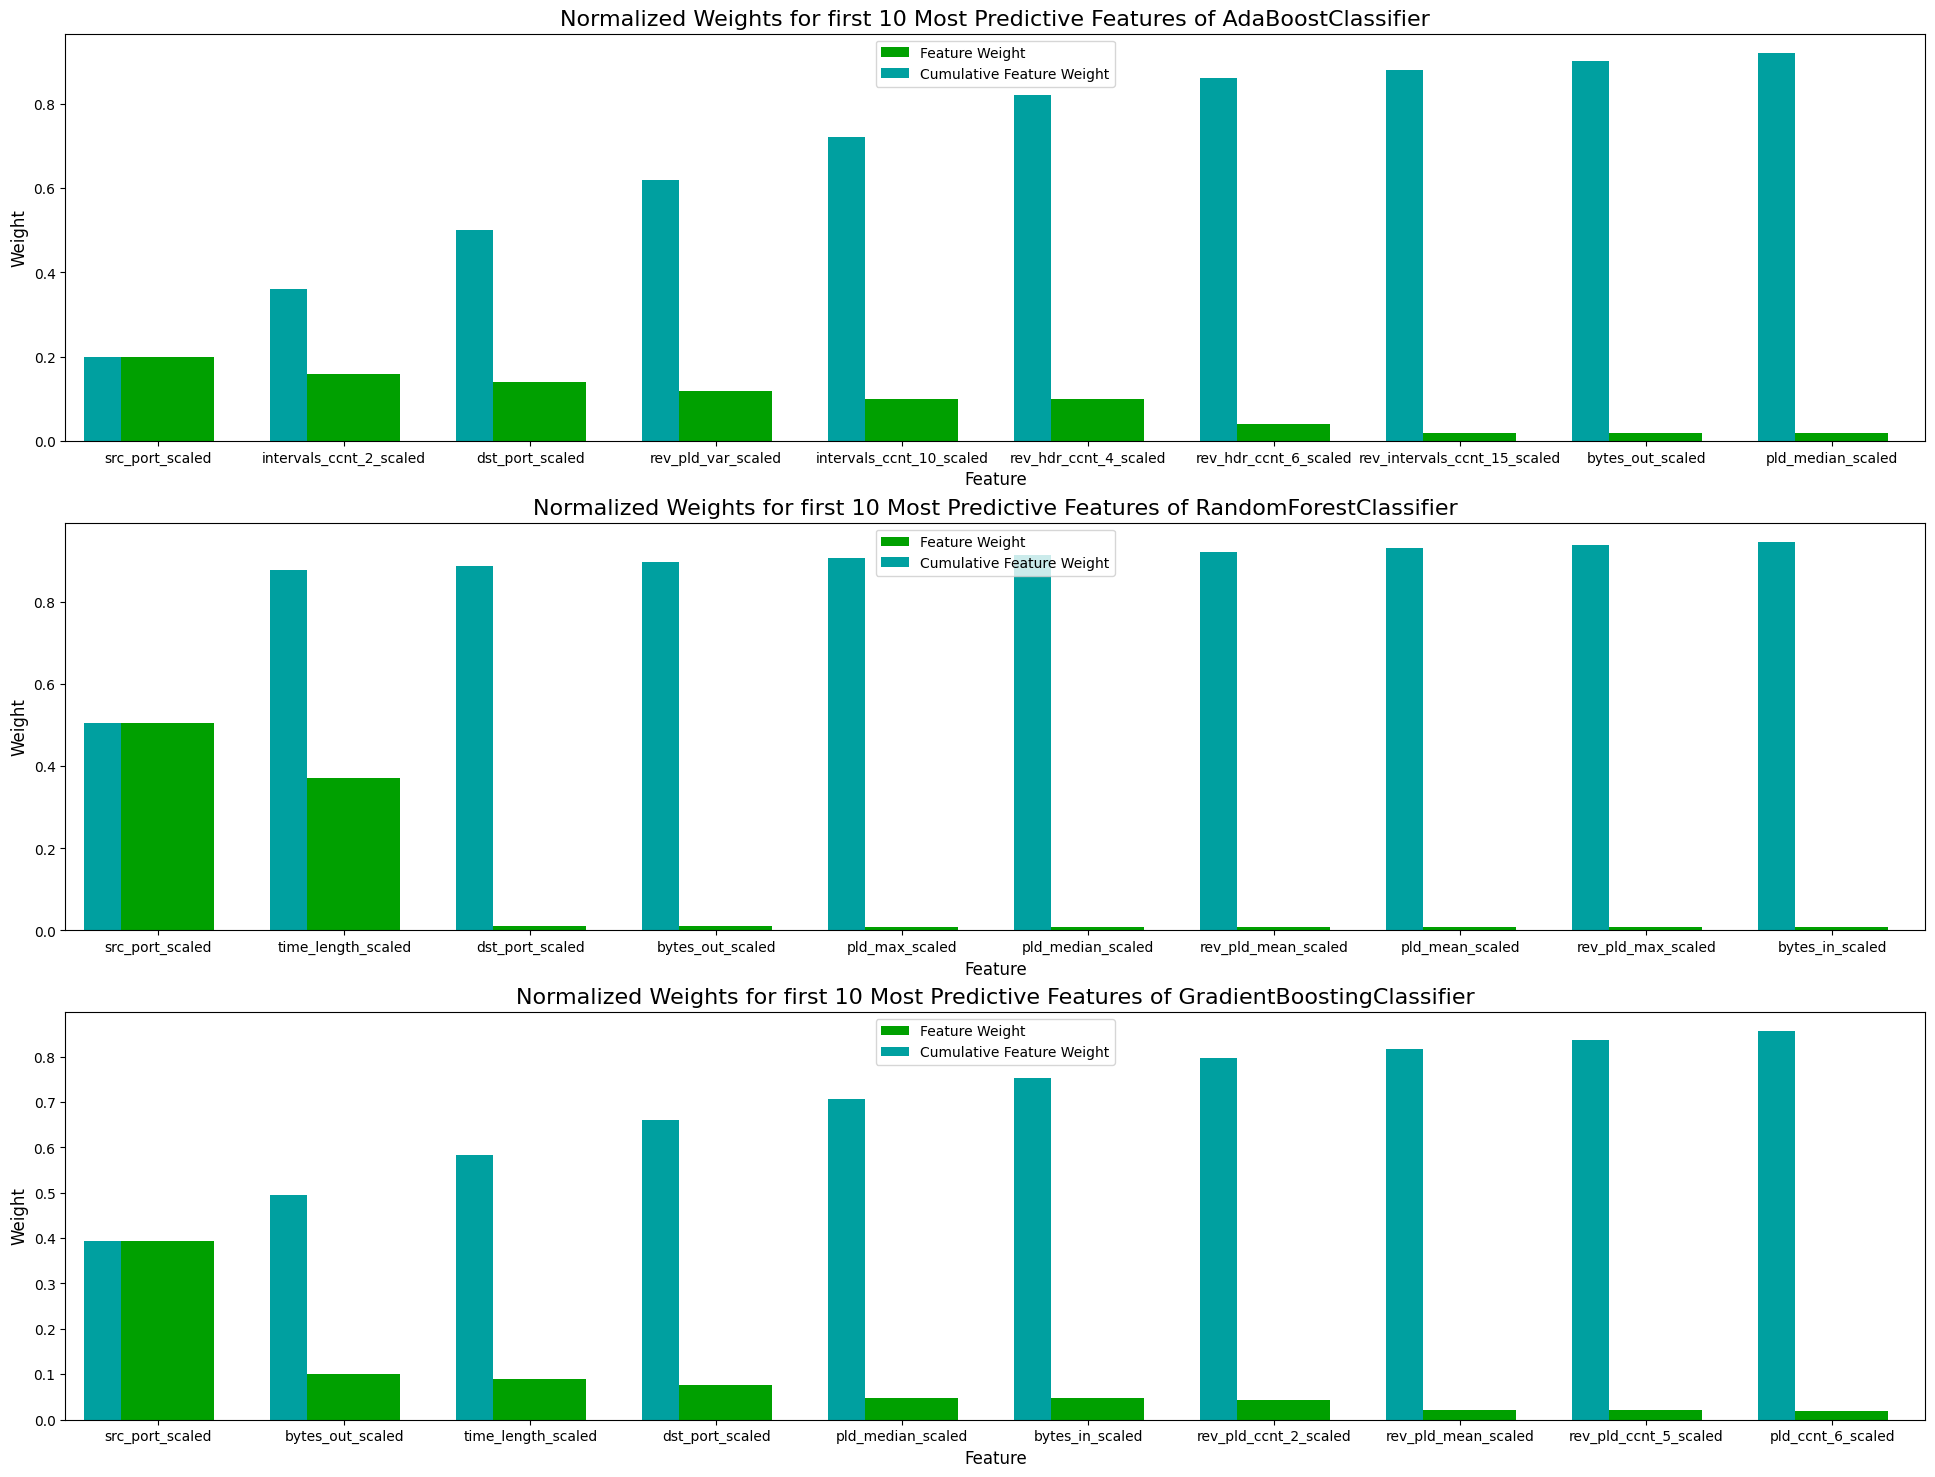

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(24, 18))

models = [clf_A, clf_B, clf_C]
n_features = 10

for i, model in enumerate(models):
    # Extract the feature importances using .feature_importances_
    importances = model.feature_importances_
    # Plot
    vs.feature_plot(model, importances, X_train, y_train, n_features=n_features, ax=ax[i])

## Train model again on ten most important features

We train the best performing model (which is GradientBoostingClassifier) again but only on the ten most important features.

In [12]:
# Import functionality for cloning a model
from sklearn.base import clone

# Extract most important features
best_clf = clf_C
best_predictions = best_clf.predict(X_test)

importances = best_clf.feature_importances_

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:n_features]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:n_features]]]

X_train_reduced

,src_port_scaled,bytes_out_scaled,time_length_scaled,dst_port_scaled,pld_median_scaled,bytes_in_scaled,rev_pld_ccnt_2_scaled,rev_pld_mean_scaled,rev_pld_ccnt_5_scaled,pld_ccnt_6_scaled
id,,,,,,,,,,
531882,0.833158,11.946868,4.539342,0.006760,6.915723,9.659759,22.142094,4.705920,-0.066946,2.611701
133404,0.032975,7.510978,1.096544,0.006760,0.000000,8.547722,-0.038042,6.352054,-0.066946,-0.017816
3330774,0.952941,4.488636,8.165921,0.081712,3.135494,0.000000,-0.038042,0.000000,-0.066946,-0.017816
4327970,0.930938,4.672829,0.000000,0.391470,4.672829,5.730100,-0.038042,5.730100,-0.066946,-0.017816
4140665,0.954788,3.806662,0.351183,0.081712,3.135494,0.000000,-0.038042,0.000000,-0.066946,-0.017816
...,...,...,...,...,...,...,...,...,...,...
4700690,0.803464,3.806662,0.347189,0.081712,3.135494,0.000000,-0.038042,0.000000,-0.066946,-0.017816
7766119,0.835172,3.806662,0.372416,0.081712,3.135494,0.000000,-0.038042,0.000000,-0.066946,-0.017816
8855141,0.755978,7.066467,5.485345,0.006760,0.693147,7.092574,0.886131,4.018902,-0.066946,-0.017816


In [13]:
# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='micro')))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5, average='micro')))

Final Model trained on full data
------
Accuracy on testing data: 0.3328
F-score on testing data: 0.3328

Final Model trained on reduced data
------
Accuracy on testing data: 0.3324
F-score on testing data: 0.3324
